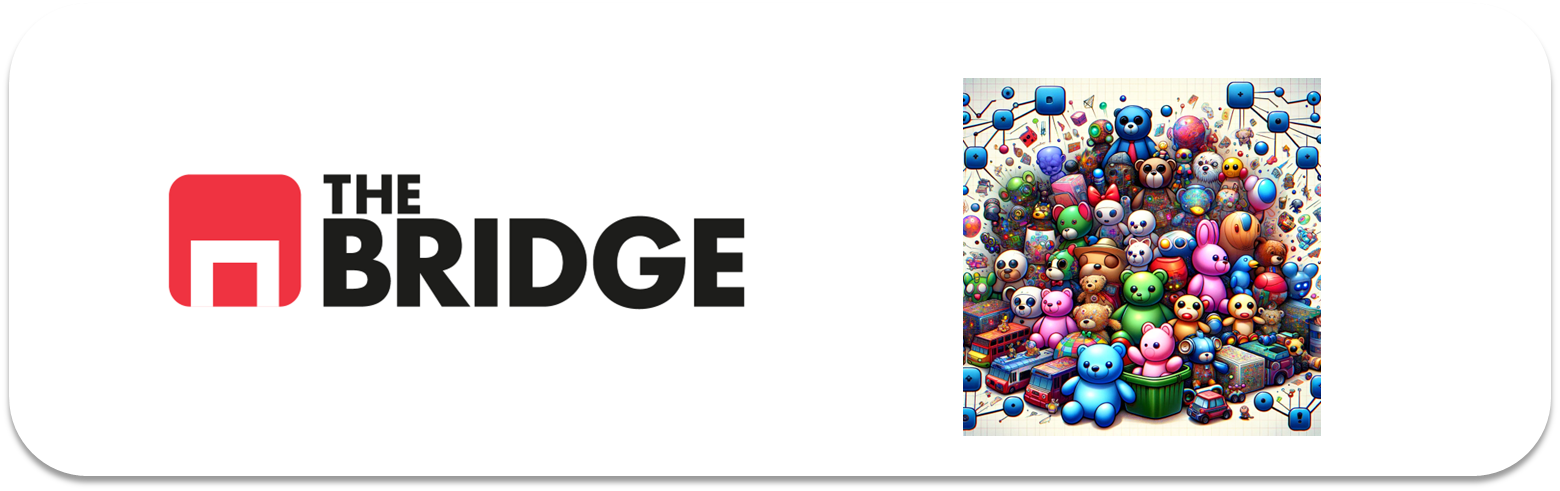

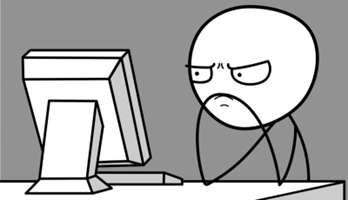

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MinMaxScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1


Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [189]:
import sklearn.datasets 
df_olivetti = pd.DataFrame(sklearn.datasets.fetch_olivetti_faces()['data'])
df_olivetti


0         1         2         3         4         5         6     \
0    0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1    0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2    0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3    0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4    0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.400826  0.495868  0.570248  0.632231  0.648760  0.640496  0.661157   
396  0.367769  0.367769  0.351240  0.301653  0.247934  0.247934  0.367769   
397  0.500000  0.533058  0.607438  0.628099  0.657025  0.632231  0.657025   
398  0.214876  0.219008  0.219008  0.223140  0.210744  0.202479  0.276859   
399  0.516529  0.462810  0.280992  0.252066  0.247934  0.367769  0.574380   

         7         8         9     ...      4086      4087      4088  \
0    0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893   
1    0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364   
2    0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818   
3    0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025   
4    0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.636364  0.665289  0.698347  ...  0.388430  0.396694  0.264463   
396  0.512397  0.574380  0.628099  ...  0.380165  0.334711  0.289256   
397  0.669421  0.673554  0.702479  ...  0.194215  0.148760  0.152893   
398  0.400826  0.487603  0.549587  ...  0.446281  0.392562  0.367769   
399  0.615702  0.661157  0.615702  ...  0.276859  0.264463  0.293388   

         4089      4090      4091      4092      4093      4094      4095  
0    0.661157  0.475207  0.132231  0.148760  0.152893  0.161157  0.157025  
1    0.148760  0.152893  0.152893  0.152893  0.152893  0.152893  0.152893  
2    0.136364  0.128099  0.148760  0.144628  0.140496  0.148760  0.152893  
3    0.685950  0.727273  0.743802  0.764463  0.752066  0.752066  0.739669  
4    0.173554  0.177686  0.177686  0.177686  0.177686  0.173554  0.173554  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.099174  0.181818  0.243802  0.247934  0.161157  0.157025  0.136364  
396  0.285124  0.338843  0.404959  0.458678  0.487603  0.512397  0.549587  
397  0.161157  0.161157  0.173554  0.157025  0.177686  0.148760  0.190083  
398  0.409091  0.479339  0.524793  0.545455  0.574380  0.590909  0.603306  
399  0.301653  0.293388  0.322314  0.322314  0.359504  0.355372  0.384298  

[400 rows x 4096 columns]

In [90]:
sklearn.datasets.fetch_olivetti_faces()['DESCR']

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and\nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position\n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n=================   ==================

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [190]:
target = pd.Series(sklearn.datasets.fetch_olivetti_faces()["target"])
target = target.rename("target")
target

0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: target, Length: 400, dtype: int64

In [191]:
# No es necesario pero se hizo un df unificado
df_olivetti_total = pd.concat([target,df_olivetti],axis=1)
df_olivetti_total

target         0         1         2         3         4         5  \
0         0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438   
1         0  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496   
2         0  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025   
3         0  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083   
4         0  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083   
..      ...       ...       ...       ...       ...       ...       ...   
395      39  0.400826  0.495868  0.570248  0.632231  0.648760  0.640496   
396      39  0.367769  0.367769  0.351240  0.301653  0.247934  0.247934   
397      39  0.500000  0.533058  0.607438  0.628099  0.657025  0.632231   
398      39  0.214876  0.219008  0.219008  0.223140  0.210744  0.202479   
399      39  0.516529  0.462810  0.280992  0.252066  0.247934  0.367769   

            6         7         8  ...      4086      4087      4088  \
0    0.657025  0.677686  0.690083  ...  0.665289  0.669421  0.652893   
1    0.681818  0.702479  0.710744  ...  0.136364  0.157025  0.136364   
2    0.681818  0.685950  0.702479  ...  0.074380  0.132231  0.181818   
3    0.243802  0.404959  0.483471  ...  0.652893  0.636364  0.657025   
4    0.694215  0.714876  0.723140  ...  0.190083  0.161157  0.177686   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.661157  0.636364  0.665289  ...  0.388430  0.396694  0.264463   
396  0.367769  0.512397  0.574380  ...  0.380165  0.334711  0.289256   
397  0.657025  0.669421  0.673554  ...  0.194215  0.148760  0.152893   
398  0.276859  0.400826  0.487603  ...  0.446281  0.392562  0.367769   
399  0.574380  0.615702  0.661157  ...  0.276859  0.264463  0.293388   

         4089      4090      4091      4092      4093      4094      4095  
0    0.661157  0.475207  0.132231  0.148760  0.152893  0.161157  0.157025  
1    0.148760  0.152893  0.152893  0.152893  0.152893  0.152893  0.152893  
2    0.136364  0.128099  0.148760  0.144628  0.140496  0.148760  0.152893  
3    0.685950  0.727273  0.743802  0.764463  0.752066  0.752066  0.739669  
4    0.173554  0.177686  0.177686  0.177686  0.177686  0.173554  0.173554  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.099174  0.181818  0.243802  0.247934  0.161157  0.157025  0.136364  
396  0.285124  0.338843  0.404959  0.458678  0.487603  0.512397  0.549587  
397  0.161157  0.161157  0.173554  0.157025  0.177686  0.148760  0.190083  
398  0.409091  0.479339  0.524793  0.545455  0.574380  0.590909  0.603306  
399  0.301653  0.293388  0.322314  0.322314  0.359504  0.355372  0.384298  

[400 rows x 4097 columns]

In [192]:
# Procedemos a reordenar de forma aleatoria el dataframe
df_olivetti_random = df_olivetti_total.sample(frac=1, random_state=42).reset_index(drop=True)
df_olivetti_random

target         0         1         2         3         4         5  \
0        20  0.198347  0.235537  0.351240  0.409091  0.421488  0.429752   
1        28  0.185950  0.128099  0.115702  0.132231  0.185950  0.268595   
2         3  0.508264  0.603306  0.619835  0.628099  0.657025  0.665289   
3        21  0.136364  0.140496  0.185950  0.280992  0.318182  0.363636   
4         9  0.652893  0.644628  0.652893  0.706612  0.714876  0.719008   
..      ...       ...       ...       ...       ...       ...       ...   
395       7  0.194215  0.223140  0.314050  0.500000  0.636364  0.735537   
396      10  0.260331  0.355372  0.648760  0.822314  0.838843  0.834711   
397      27  0.611570  0.644628  0.657025  0.669421  0.673554  0.710744   
398      34  0.285124  0.293388  0.297521  0.293388  0.219008  0.107438   
399      10  0.326446  0.144628  0.260331  0.752066  0.847107  0.851240   

            6         7         8  ...      4086      4087      4088  \
0    0.500000  0.528926  0.524793  ...  0.528926  0.508264  0.524793   
1    0.433884  0.541322  0.570248  ...  0.400826  0.396694  0.409091   
2    0.690083  0.727273  0.743802  ...  0.438017  0.301653  0.305785   
3    0.409091  0.417355  0.438017  ...  0.198347  0.169421  0.206612   
4    0.743802  0.747934  0.747934  ...  0.061983  0.074380  0.074380   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.797521  0.826446  0.847107  ...  0.210744  0.206612  0.181818   
396  0.830579  0.826446  0.822314  ...  0.330579  0.264463  0.185950   
397  0.735537  0.756198  0.760331  ...  0.198347  0.152893  0.107438   
398  0.342975  0.508264  0.533058  ...  0.359504  0.388430  0.442149   
399  0.847107  0.847107  0.851240  ...  0.384298  0.376033  0.334711   

         4089      4090      4091      4092      4093      4094      4095  
0    0.504132  0.483471  0.471074  0.285124  0.061983  0.128099  0.090909  
1    0.301653  0.421488  0.462810  0.247934  0.190083  0.210744  0.210744  
2    0.314050  0.326446  0.338843  0.330579  0.334711  0.342975  0.342975  
3    0.276859  0.355372  0.685950  0.661157  0.280992  0.371901  0.276859  
4    0.082645  0.082645  0.111570  0.070248  0.086777  0.185950  0.231405  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.165289  0.123967  0.123967  0.128099  0.136364  0.169421  0.165289  
396  0.136364  0.177686  0.132231  0.103306  0.103306  0.107438  0.119835  
397  0.119835  0.132231  0.111570  0.136364  0.177686  0.210744  0.223140  
398  0.475207  0.500000  0.516529  0.520661  0.533058  0.533058  0.537190  
399  0.243802  0.210744  0.157025  0.181818  0.140496  0.301653  0.157025  

[400 rows x 4097 columns]

In [193]:
# Ahora dividimos en X e y
X = df_olivetti_random.iloc[:,1:]
y = df_olivetti_random.iloc[:,0]
X

0         1         2         3         4         5         6     \
0    0.198347  0.235537  0.351240  0.409091  0.421488  0.429752  0.500000   
1    0.185950  0.128099  0.115702  0.132231  0.185950  0.268595  0.433884   
2    0.508264  0.603306  0.619835  0.628099  0.657025  0.665289  0.690083   
3    0.136364  0.140496  0.185950  0.280992  0.318182  0.363636  0.409091   
4    0.652893  0.644628  0.652893  0.706612  0.714876  0.719008  0.743802   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.194215  0.223140  0.314050  0.500000  0.636364  0.735537  0.797521   
396  0.260331  0.355372  0.648760  0.822314  0.838843  0.834711  0.830579   
397  0.611570  0.644628  0.657025  0.669421  0.673554  0.710744  0.735537   
398  0.285124  0.293388  0.297521  0.293388  0.219008  0.107438  0.342975   
399  0.326446  0.144628  0.260331  0.752066  0.847107  0.851240  0.847107   

         7         8         9     ...      4086      4087      4088  \
0    0.528926  0.524793  0.553719  ...  0.528926  0.508264  0.524793   
1    0.541322  0.570248  0.586777  ...  0.400826  0.396694  0.409091   
2    0.727273  0.743802  0.768595  ...  0.438017  0.301653  0.305785   
3    0.417355  0.438017  0.454545  ...  0.198347  0.169421  0.206612   
4    0.747934  0.747934  0.756198  ...  0.061983  0.074380  0.074380   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.826446  0.847107  0.847107  ...  0.210744  0.206612  0.181818   
396  0.826446  0.822314  0.814050  ...  0.330579  0.264463  0.185950   
397  0.756198  0.760331  0.768595  ...  0.198347  0.152893  0.107438   
398  0.508264  0.533058  0.557851  ...  0.359504  0.388430  0.442149   
399  0.847107  0.851240  0.842975  ...  0.384298  0.376033  0.334711   

         4089      4090      4091      4092      4093      4094      4095  
0    0.504132  0.483471  0.471074  0.285124  0.061983  0.128099  0.090909  
1    0.301653  0.421488  0.462810  0.247934  0.190083  0.210744  0.210744  
2    0.314050  0.326446  0.338843  0.330579  0.334711  0.342975  0.342975  
3    0.276859  0.355372  0.685950  0.661157  0.280992  0.371901  0.276859  
4    0.082645  0.082645  0.111570  0.070248  0.086777  0.185950  0.231405  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.165289  0.123967  0.123967  0.128099  0.136364  0.169421  0.165289  
396  0.136364  0.177686  0.132231  0.103306  0.103306  0.107438  0.119835  
397  0.119835  0.132231  0.111570  0.136364  0.177686  0.210744  0.223140  
398  0.475207  0.500000  0.516529  0.520661  0.533058  0.533058  0.537190  
399  0.243802  0.210744  0.157025  0.181818  0.140496  0.301653  0.157025  

[400 rows x 4096 columns]

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [194]:
# Abajo se hizo el split de 2 formas distintas, sin embargo, para buscar aleatoriedad, se prefiere usar un split
from sklearn.model_selection import train_test_split

# Primero dividimos en train y lo que se dividará en validation y test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Dividimos en validation y test

X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [200]:
target_list = target.unique().tolist()
target_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [183]:
# NO USAR. NO FUNCIONA. Prática de bucles para hacerlo yo mismo sin splits (Se tendria que usar con dataframe original sin reordenar aleatoriamente)
X_train = pd.DataFrame()
y_train = pd.Series()
X_validation = pd.DataFrame()
y_validation = pd.Series()
X_test = pd.DataFrame()
y_test = pd.Series()


for n_person in target_list:
    X_train = pd.concat([X_train, df_olivetti_total.loc[df_olivetti_total["target"] == n_person].iloc[0:8,1:]], axis=0)
    y_train = pd.concat([y_train, df_olivetti_total.loc[df_olivetti_total["target"] == n_person,"target"].iloc[0:8]], axis=0)
    X_validation = pd.concat([X_validation, df_olivetti_total.loc[df_olivetti_total["target"] == n_person].iloc[8:9,1:]], axis=0)
    y_validation = pd.concat([y_validation, df_olivetti_total.loc[df_olivetti_total["target"] == n_person,"target"].iloc[8:9]], axis=0)
    X_test = pd.concat([X_test, df_olivetti_total.loc[df_olivetti_total["target"] == n_person].iloc[9:,1:]], axis=0)
    y_test = pd.concat([y_test, df_olivetti_total.loc[df_olivetti_total["target"] == n_person,"target"].iloc[9:]], axis=0)
    
    

y_test.head(20)

9       0
19      1
29      2
39      3
49      4
59      5
69      6
79      7
89      8
99      9
109    10
119    11
129    12
139    13
149    14
159    15
169    16
179    17
189    18
199    19
dtype: int64

In [ ]:
# NO USAR. Opción de Tesla (Mas eficiente ya que pasa todo a lista y lueco concatena)
# Inicializar listas para acumular subconjuntos
X_train_list, y_train_list = [], []
X_validation_list, y_validation_list = [], []
X_test_list, y_test_list = [], []

# Iterar por cada persona en la lista de etiquetas
for n_person in target_list:
    # Filtrar filas para la persona actual
    person_data = df_olivetti_total.loc[df_olivetti_total["target"] == n_person]
    
    # Dividir en train, validation, test
    X_train_list.append(person_data.iloc[0:8, 1:-1])  # Características para entrenamiento
    y_train_list.append(person_data.iloc[0:8,0])    # Etiquetas para entrenamiento
    
    X_validation_list.append(person_data.iloc[8:9, 1:-1])  # Características para validación
    y_validation_list.append(person_data.iloc[8:9,0])    # Etiquetas para validación
    
    X_test_list.append(person_data.iloc[9:, 1:-1])  # Características para prueba
    y_test_list.append(person_data.iloc[9:,0])    # Etiquetas para prueba

# Concatenar todos los subconjuntos
X_train = pd.concat(X_train_list, axis=0)
y_train = pd.concat(y_train_list, axis=0)
X_validation = pd.concat(X_validation_list, axis=0)
y_validation = pd.concat(y_validation_list, axis=0)
X_test = pd.concat(X_test_list, axis=0)
y_test = pd.concat(y_test_list, axis=0)


### #1.4

Crea los pares X,y para train, validation y test.

In [195]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 4096)
y_train shape: (320,)
X_validation shape: (40, 4096)
y_validation shape: (40,)
X_test shape: (40, 4096)
y_test shape: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [201]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

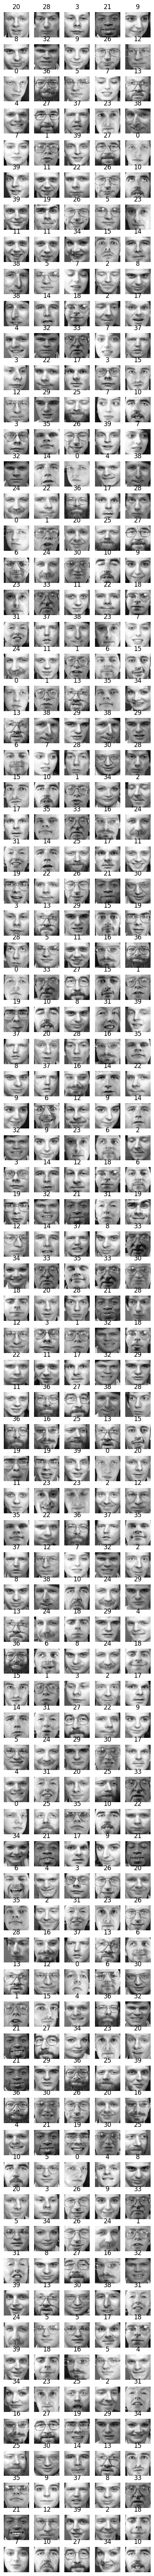

In [205]:
plot_faces(X.to_numpy(), y.to_numpy())

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [206]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_validation)
X_test_pca = pca.transform(X_test)

pca.n_components_

np.int64(221)

In [208]:
X_train_pca

array([[ 5.2641445e-01,  2.2221425e+00,  1.0683398e+00, ...,
        -1.8939742e-01, -7.9521582e-02, -1.3615431e-01],
       [ 4.3550692e+00,  2.8704741e+00, -2.5920823e-01, ...,
         6.8430401e-02, -3.4216039e-02,  1.1285400e-01],
       [ 4.5980897e+00, -3.8096443e-01, -6.3766074e-01, ...,
        -2.2071895e-01, -5.6117788e-02, -5.3079616e-02],
       ...,
       [-1.0044880e+01, -4.5379004e-01, -3.3288121e-01, ...,
        -2.2576943e-03, -2.8698217e-02, -1.2592162e-01],
       [-2.7322166e+00,  2.2137015e+00,  2.7821727e+00, ...,
        -1.7345643e-01, -2.5035077e-01, -3.8336586e-02],
       [ 3.6499872e+00, -2.2006676e+00,  3.0098447e-01, ...,
        -1.9035811e-02, -1.7132550e-02,  6.2810287e-02]], dtype=float32)

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [ ]:
#Vamos a probar con diferentes valores de k para ver cual es el mejor segun sus inercias y el metodo del codo
ks = []
sil_scores = []

for k in np.arange(2, 151,5):
    clustering = KMeans(n_clusters = k)
    clustering.fit(X_train_pca)
    sil_scores.append(silhouette_score(X_train_pca, clustering.labels_))
    ks.append(k)

In [231]:
clustering.labels_

array([122, 102,   2, 139,   8,  72, 128,  27,  31,  36, 140, 113,  76,
        30, 103,  13, 112,  90,  88,  11,  67,  69,  47,  41,  46,  83,
         8,  19,  44, 122,  93,  40,  64,   2,  94,  73,  59,  64, 142,
        45, 134, 120, 119,  37,  75,  24, 131, 105,  94,  89,  51,  34,
         7,  82,  69,  67,  33,  30,  13,  39,  13,  94, 111,  43,  68,
        28,  17,  48,  98, 108,   0,  78,   1, 132,  98,  50,  57, 110,
        85,   7,  70,  25, 107, 143,   2,  35,  83,  79,  56,  37,  33,
        35,   8,  28,  15,  16,  63,  59,  22,  25,  70,  38, 104,   1,
        17,  55, 124,   0,  92, 137,  72,  10,  10,   9,  71,  40,   0,
        82,  95,  12,  61,   2,  14,   5,  79, 100, 131,  75,  26,  34,
        61,  44, 125,  84, 130,  86,  18,  81, 105,   2, 131, 128, 109,
        84,  42, 115,   0,   9,  50,  96,   4,  92,   7,   7, 123,  12,
        94,  57,  71,  84,  96, 145,  98,   8,  52,  87,  32,  78,  80,
        71,  23,  92,  11,  82,  12,   4,  10,   1,  51,  22,  1

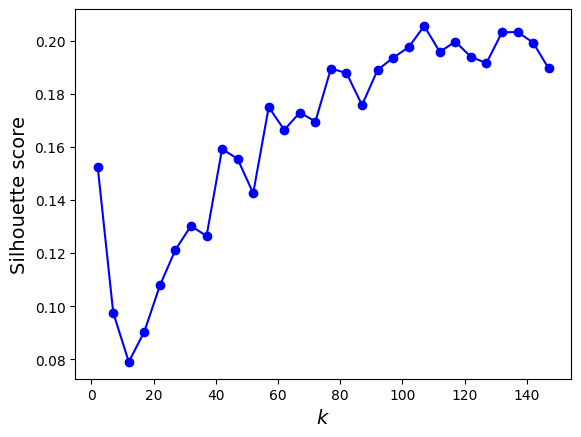

In [233]:
# Graficamos el silhouette score para cada k
plt.plot(ks, sil_scores, "bo-");
plt.xlabel("$k$", fontsize=14);
plt.ylabel("Silhouette score", fontsize=14);

In [234]:
# La k recomendada según este parámetro es 107
top_sil = max(sil_scores)
position_top_sil = sil_scores.index(top_sil)
top_k = ks[position_top_sil]
top_k

np.int64(107)

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [232]:
ks = []
inertias = []

for k in np.arange(2,151,5):
    clustering = KMeans(n_clusters=k)
    clustering.fit(X_train_pca)
    inertias.append(clustering.inertia_)
    ks.append(k)

In [ ]:
# Dataframe con las inercias. Vemos que a medida sube K, la inercia baja
df_inertias = pd.DataFrame({'k': ks, 'inertia': inertias})
df_inertias

k       inertia
0     2  21219.837891
1     7  16554.257812
2    12  14381.674805
3    17  13176.307617
4    22  12162.002930
5    27  11453.412109
6    32  10588.690430
7    37  10011.090820
8    42   9043.675781
9    47   8697.014648
10   52   8328.201172
11   57   7705.386719
12   62   7265.407715
13   67   6769.032227
14   72   6434.931641
15   77   6014.897949
16   82   5742.910156
17   87   5573.398926
18   92   5199.313477
19   97   4991.245117
20  102   4642.979980
21  107   4534.033203
22  112   4186.013184
23  117   4070.661377
24  122   3834.758301
25  127   3705.656982
26  132   3436.806396
27  137   3260.417725
28  142   3075.044189
29  147   2929.091309

In [ ]:
# Observamos qué tanto varían las inercias de una k a otra. Son muchos números la verdad. EN este caso k no aparenta ser la opción ideal.
df_inertias['diff'] = df_inertias['inertia'] - df_inertias['inertia'].shift(1)
df_inertias

k       inertia         diff
0     2  21219.837891          NaN
1     7  16554.257812 -4665.580078
2    12  14381.674805 -2172.583008
3    17  13176.307617 -1205.367188
4    22  12162.002930 -1014.304688
5    27  11453.412109  -708.590820
6    32  10588.690430  -864.721680
7    37  10011.090820  -577.599609
8    42   9043.675781  -967.415039
9    47   8697.014648  -346.661133
10   52   8328.201172  -368.813477
11   57   7705.386719  -622.814453
12   62   7265.407715  -439.979004
13   67   6769.032227  -496.375488
14   72   6434.931641  -334.100586
15   77   6014.897949  -420.033691
16   82   5742.910156  -271.987793
17   87   5573.398926  -169.511230
18   92   5199.313477  -374.085449
19   97   4991.245117  -208.068359
20  102   4642.979980  -348.265137
21  107   4534.033203  -108.946777
22  112   4186.013184  -348.020020
23  117   4070.661377  -115.351807
24  122   3834.758301  -235.903076
25  127   3705.656982  -129.101318
26  132   3436.806396  -268.850586
27  137   3260.417725  -176.388672
28  142   3075.044189  -185.373535
29  147   2929.091309  -145.952881

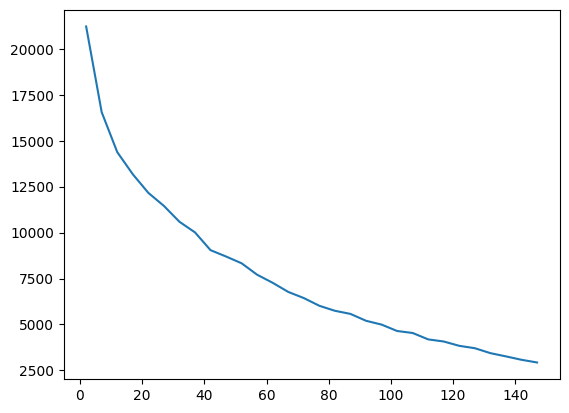

In [ ]:
#El análisis del codo tampoco ayuda mucho....
plt.plot(ks, inertias);

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [239]:
best_model = KMeans(n_clusters=top_k)
best_model.fit(X_train_pca)

KMeans(n_clusters=np.int64(107))

### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

In [246]:
best_model.labels_

array([ 50,  23,  23,  92,  25,   2,   1,  43,  82,  77,  11,  81,  79,
        20,  11,  30,  43,  57,  15,   0,  66,   0,  47,  61,   9,  60,
        25,  12,  72,  50,  23,  99,  80,  99,  55,   4,  55,  80,  57,
       101,  79,  21,  88,  68,  18,  18,  35,  77,  55,  92,  94,  75,
        17,  14,   0,  66,  58,  20,  30,  65,  30,  55,  88,  21,  81,
        33,  26,  48,  29,  49,  32,  51,   7,  70,  29,  35,  42,  25,
        69,  17,  27,   1,  78,  10,  37,  76,  60,  28,  87,  68,  40,
        38,  25,  33,   8,  13,  90,  55,  86,  46,  27,  34,   4,   7,
        26,  84,  95,  32,  46,  67,   2,  14,  67,  97,  23,  54,  32,
        14,  16,  39,   6,  37,  76,  35,  28,  12,  35,  18, 104,  75,
         6,  72,  69,  10,  80,  22,  89,  64,  77,  37,  35,  40, 100,
        10,  83,  58,  32,  44,  35,  22,   3,  94,  17,  17,  51,  39,
        40,  42,  44,  10,  22,  16,  29,  25,  71,  20,   4,  51,  53,
        23,  74,  46,   0,  14,  39,  93,  67,  99,  94,  86,  8

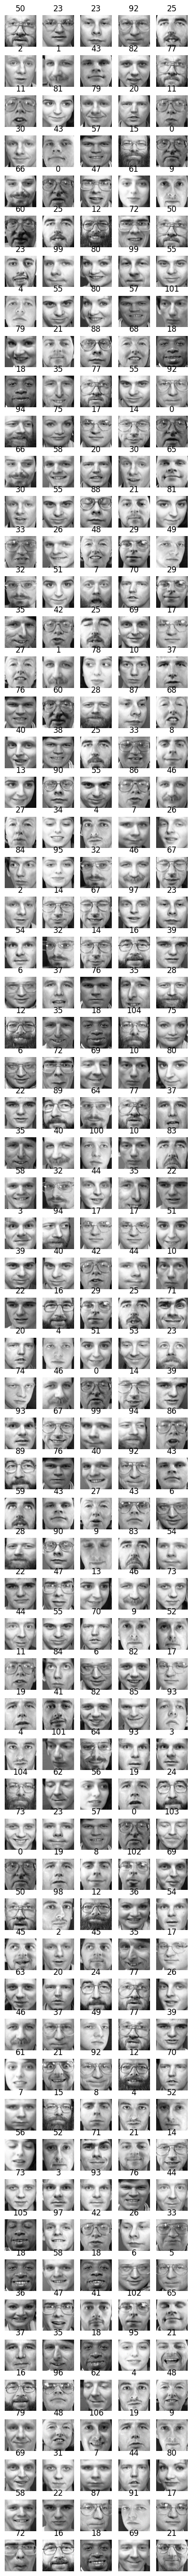

In [247]:
plot_faces(X_train.to_numpy(), best_model.labels_)

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instanciamos el modelo

rfc = RandomForestClassifier(n_estimators=150,random_state=42)

# Lo entrenamos con la data de train

rfc.fit(X=X_train_pca,y=y_train)

# Ahora predecimos para validation

y_predict_valid = rfc.predict(X=X_valid_pca)

accuracy_score(y_validation, y_predict_valid)

# Vemos que tiene un alto nivel de accuracy con la data de validation (0.925)



0.925

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [ ]:
# best_model contiene un Kmeans con la mejor k encontrada (107). 
# El modelo tiene dentro algoritmos que convierten cada punto en una fila y cada columna en la distancia de este punto respecto a cada K (centroide). Es decir que tiene 107 columnas.
# Procedemos entonces a convertir cada datset en una serie de puntos donde las columnas son su distancia respecto a la centroide de cada cluster.
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)


In [ ]:
# Volvemos a hacer un random forest a ver si nos sale mejor

rfc = RandomForestClassifier(n_estimators=150,random_state=42)

# Lo entrenamos con la data de train

rfc.fit(X=X_train_reduced,y=y_train)

# Ahora predecimos para validation

y_predict_valid_2 = rfc.predict(X=X_valid_reduced)

accuracy_score(y_validation, y_predict_valid_2)

# Podemos ver que aparentemente se pierde información ya que el accuracy es menor

0.775

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)